In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

In [7]:
#dictionary to the prosesd data
ticks_by_poz = {}

#list of the file names
filenames = ["smt1.log"]

#read in loop
for filename in filenames:
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            match = re.search(r"\[CHAT\]\s*poz:\s*(\d+)\s*tick:\s*(\d+)", line)
            if match:
                poz = int(match.group(1))
                tick = int(match.group(2))
                ticks_by_poz.setdefault(poz, []).append(tick)
    print("Prossesd: "+filename)


Prossesd: smt1.log


In [ ]:
# when working with large files it is useful to save the prosesd data. We recomend the picle module but others may also work

#LOAD
#with open("creeper.pkl", "rb") as f:
#    ticks_by_poz = pickle.load(f)

# SAVE
#with open("creeper.pkl", "wb") as f:
#    pickle.dump(ticks_by_poz, f)

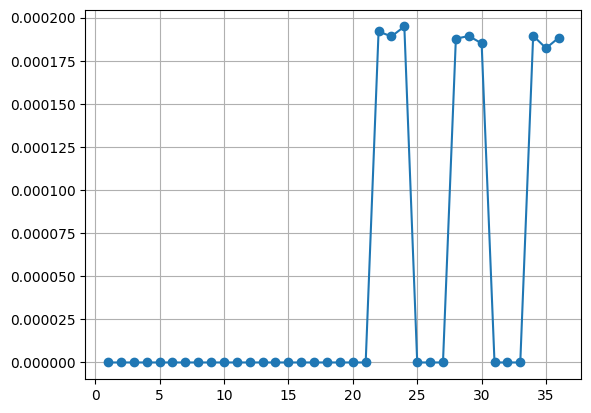

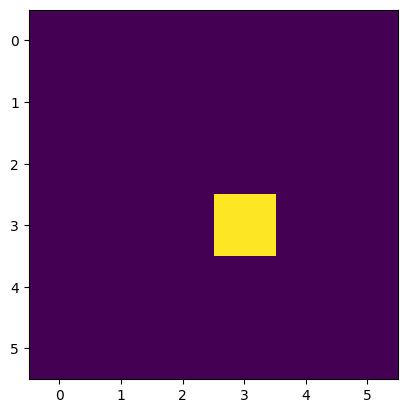

In [13]:
#image reconstruction
coords=[]
probs=[]
Nmeasures=[]
for poz in ticks_by_poz:
    Nmeasures.append(np.shape(ticks_by_poz[poz]))
    probs.append(1/(np.mean(ticks_by_poz[poz])-2))
    if Nmeasures[-1][0]==1:
        probs[-1]=0
    coords.append(poz)

plt.figure()
plt.plot(coords,probs,'o-')
plt.grid()

x=np.array(coords).reshape((6,6))
y=np.array(probs).reshape((6,6))
n=(np.round(21*21*(1-(1-120*y)**0.1))).astype(int)
base=np.zeros((7,7),dtype=int)

base[1:7,1:7]=n
image=np.zeros((6,6),dtype=int)

for i in range(6):
    for j in range(6):
        image[i,j]=base[i+1,j+1]-base[i+1,j]-base[i,j+1]+base[i,j]

plt.figure()
plt.imshow(image)

#print(Nmeasures)
#print(base)